In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar

In [592]:
df = pd.read_csv('D:\Pobrrane\scoped_dir3064_1389425060\droptime.csv')
df = pd.DataFrame(df)
day_list = []
to_drop = ['order_id.1','product_id.1', 'order_id.2']
df = df.drop(labels = to_drop, axis = 1)
df = df[df['delivery_duration']>0]
df = df[df['delivery_duration']<60*60]
#df.plot(x='order_id', y='delivery_duration', xlabel = 'Order number' , ylabel='Delivery time', legend=False)

hours = []
for x in df['segment_end_time']:
    year, month, day = x.split('-')
    hour = day[3:5]
    day=day[0:3]
    day, month, year = int(day), int(month), int(year)
    ans = datetime.date(year, month, day)
    day_list.append(ans.strftime("%A"))
    if hour[0] == '0':
        hour=hour[-1]
    hours.append(int(hour)) 

df['day'] = day_list
df['hour'] = hours
df_notgrouped = df.copy()
df = df.groupby(by='order_id').head(1).sort_values(by='order_id')

In [593]:
hours = sorted(df.hour.unique())


In [594]:
dic = {}
time_list = []
dic2 = {}

In [ ]:
for i in df_notgrouped['order_id'].unique():
    time = df_notgrouped.delivery_duration[df_notgrouped['order_id'] == i].values
    time = int(time[0])
    quantity_sum = sum(df_notgrouped.quantity[df_notgrouped['order_id'] == i].values)
    if quantity_sum not in dic:
        dic[quantity_sum] = [time]
    dic[quantity_sum].append(time)
for key in sorted(list(dic.keys())):
    if len(dic[key])>50:
        dic2[key] = sum(dic[key])/len(dic[key])

In [596]:
for i in df_notgrouped['order_id'].unique():
    time = df_notgrouped.delivery_duration[df_notgrouped['order_id'] == i].values
    time = int(time[0])
    quantity_sum = sum(df_notgrouped.quantity[df_notgrouped['order_id'] == i].values)
    if quantity_sum not in dic:
        dic[quantity_sum] = [time]
    dic[quantity_sum].append(time)
for key in sorted(list(dic.keys())):
    if len(dic[key])>50:
        dic2[key] = sum(dic[key])/len(dic[key])

<class 'numpy.int64'>


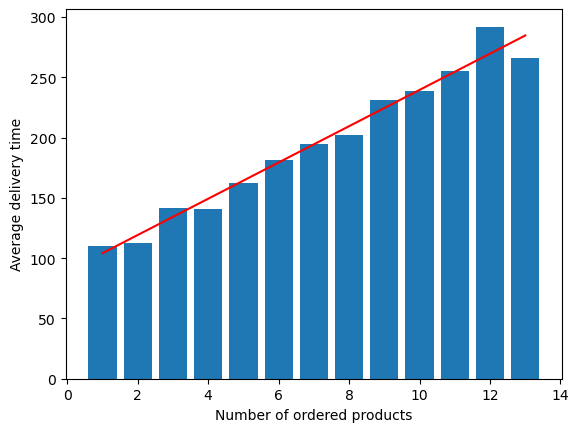

In [597]:
keys = list(dic2.keys())
values = list(dic2.values())
print(type(keys[1]))
plt.bar(list(dic2.keys()), list(dic2.values()))
plt.ylabel('Average delivery time')
plt.xlabel('Number of ordered products')
keys = np.array(keys)
values = np.array(values)
m, b = np.polyfit(keys, values, 1)
plt.plot(keys, m*keys + b, c='red', label = 'Regression line')


In [598]:
df_notgrouped

,order_id,customer_id,sector_id,planned_delivery_duration,product_id,quantity,weight,segment_id,driver_id,segment_type,segment_start_time,segment_end_time,delivery_duration,day,hour
0,0,116,1,176,5,2,1993,2738,3,STOP,2024-02-04 08:34:03,2024-02-04 08:39:12,309,Sunday,8
1,0,116,1,176,70,2,1066,2738,3,STOP,2024-02-04 08:34:03,2024-02-04 08:39:12,309,Sunday,8
2,0,116,1,176,84,1,1675,2738,3,STOP,2024-02-04 08:34:03,2024-02-04 08:39:12,309,Sunday,8
3,1,160,1,169,20,3,1974,2751,1,STOP,2024-02-02 08:47:30,2024-02-02 08:48:39,69,Friday,8
4,2,94,2,177,17,3,1612,1137,3,STOP,2024-02-15 07:11:54,2024-02-15 07:15:15,201,Thursday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,2239,7,1,169,22,1,407,3256,2,STOP,2024-02-02 19:42:38,2024-02-02 19:46:23,225,Friday,19
6783,2239,7,1,169,47,1,310,3256,2,STOP,2024-02-02 19:42:38,2024-02-02 19:46:23,225,Friday,19
6784,2239,7,1,169,48,3,256,3256,2,STOP,2024-02-02 19:42:38,2024-02-02 19:46:23,225,Friday,19
6785,2239,7,1,169,52,1,1306,3256,2,STOP,2024-02-02 19:42:38,2024-02-02 19:46:23,225,Friday,19


In [599]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = []
y = []

In [600]:
for day in days:
    y.append(df.delivery_duration[df.day==day].mean())
    x.append(day)

Text(0.5, 0, 'Average delivery time')

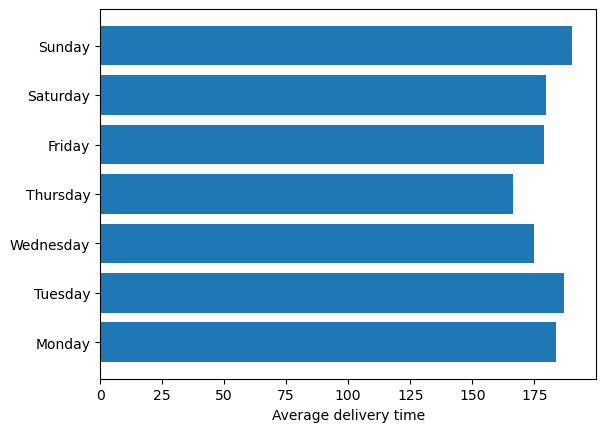

In [601]:
plt.barh(x, y)
plt.xlabel('Average delivery time')

Text(0.5, 0, 'The hour')

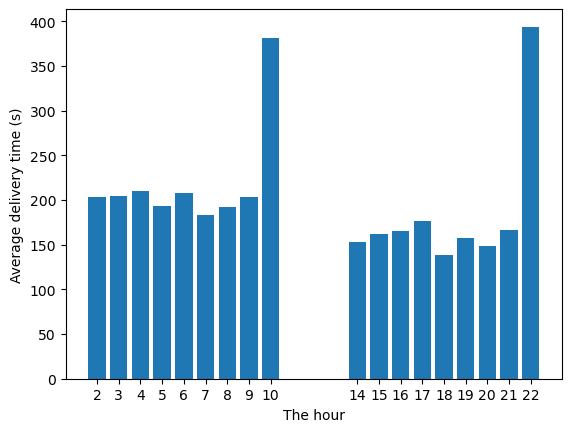

In [602]:
averages = []
for hour in hours:
    averages.append(df.delivery_duration[df.hour==hour].mean())
plt.bar(hours, averages,tick_label=hours)
plt.ylabel('Average delivery time (s)')
plt.xlabel('The hour')

In [603]:
drivers = sorted(df.driver_id.unique())
avgs = []
for driver in drivers:
    avgs.append(df.delivery_duration[df.driver_id == driver].mean())

[Text(0, 0, '73.0s'),
 Text(0, 0, '144.5s'),
 Text(0, 0, '210.9s'),
 Text(0, 0, '291.2s')]

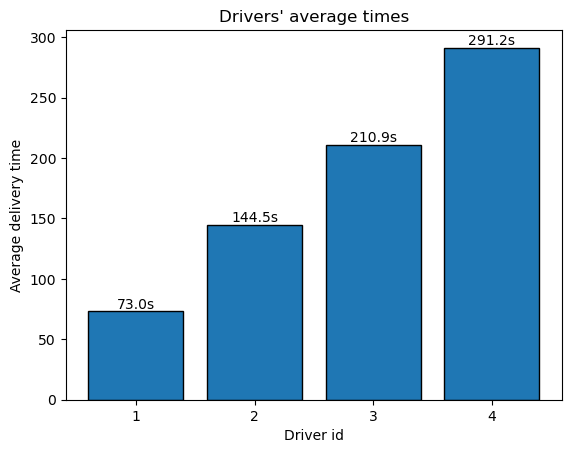

In [604]:
df.driver_id.value_counts()
fig, ax = plt.subplots()
bar_container = ax.bar(drivers, avgs, tick_label = drivers, edgecolor = 'black')
ax.set(xlabel = 'Driver id', ylabel='Average delivery time', title="Drivers' average times")
ax.bar_label(bar_container, fmt=lambda x: f'{x :.1f}s')

[Text(0, 0, '237.7 seconds'),
 Text(0, 0, '151.5 seconds'),
 Text(0, 0, '152.1 seconds')]

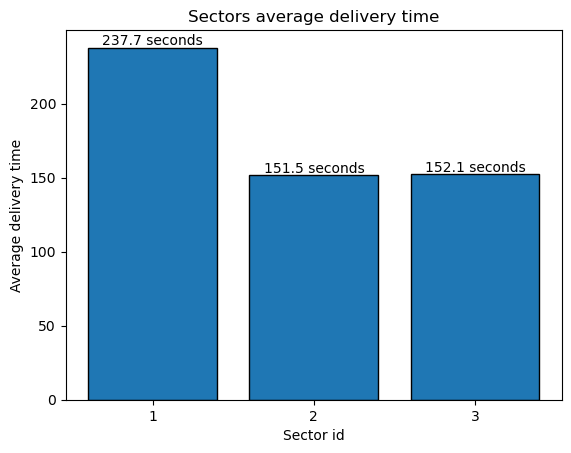

In [605]:
areas = sorted(df.sector_id.unique())
avs = []

for area in areas:
    avs.append(df.delivery_duration[df.sector_id == area].mean())

fig, ax = plt.subplots()
bar_container = ax.bar(areas, avs, tick_label = areas,edgecolor = 'black')
ax.set(xlabel = 'Sector id', ylabel='Average delivery time', title='Sectors average delivery time')
ax.bar_label(bar_container, fmt=lambda x: f'{x :.1f} seconds')

[5. 1. 3. ... 1. 2. 4.]


Text(0, 0.5, 'Number of deliveries')

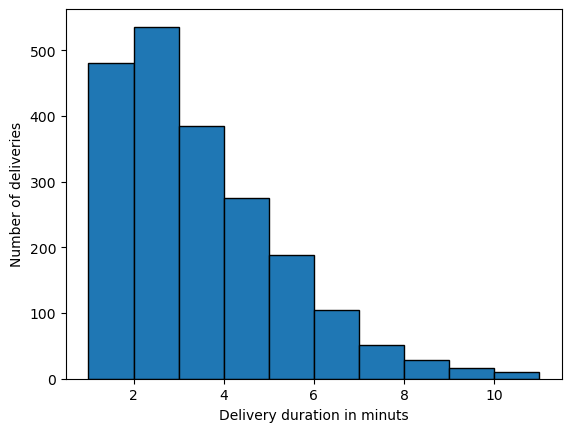

In [606]:
time_values = list(df['delivery_duration'].values)
time_values = np.array(time_values)/60
time_values = np.round(time_values)
print(time_values)
bins = [x for x in range(1,int(max(time_values)))]

plt.hist(time_values, edgecolor = 'black', bins = bins)
plt.xlabel('Delivery duration in minuts')
plt.ylabel('Number of deliveries')

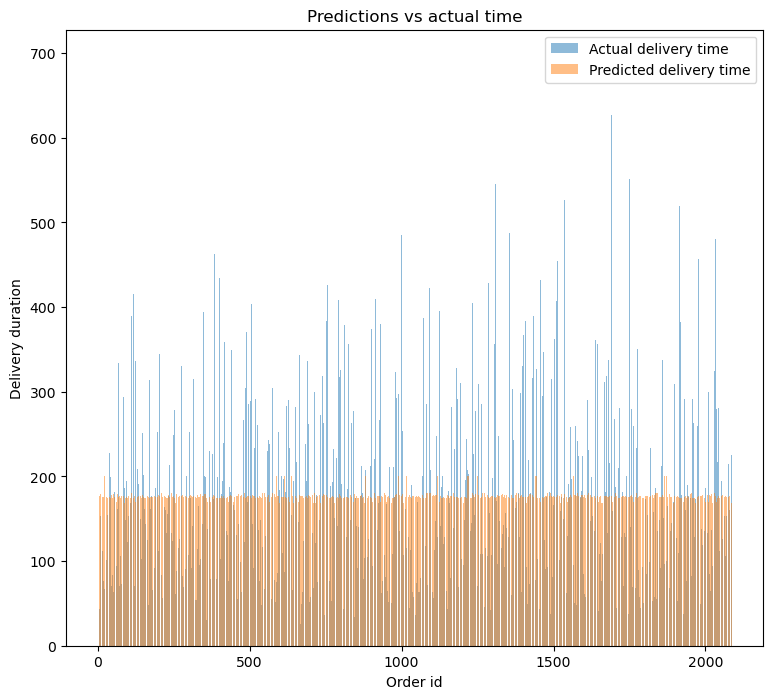

In [608]:
df['delivery_duration'].isnull()

y1 = df['delivery_duration'].values
y2 = df['planned_delivery_duration'].values
x = [x for x in range(len(y1))]
plt.figure(figsize=(9,8))
plt.bar(x, y1, alpha=0.5, label = 'Actual delivery time')
plt.bar(x , y2, alpha=0.5, label = 'Predicted delivery time')
plt.xlabel('Order id')
plt.ylabel('Delivery duration')
plt.title('Predictions vs actual time')
plt.legend()

Text(0, 0.5, 'Count of errors')

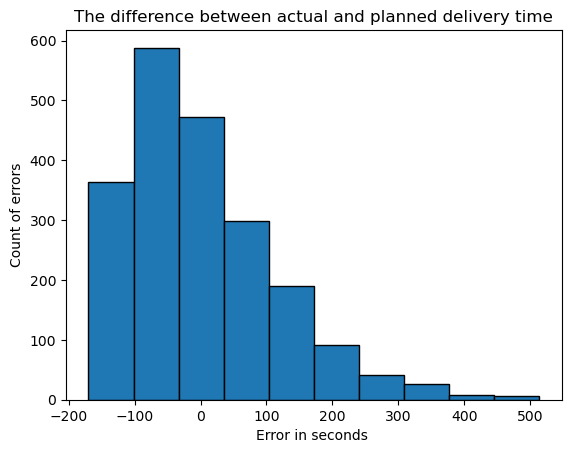

In [611]:
plt.hist(y1-y2, edgecolor = 'black')
plt.title('The difference between actual and planned delivery time')
plt.xlabel('Error in seconds ')
plt.ylabel('Count of errors')

Text(0.5, 1.0, 'Prediction error (actual minus predicted time)')

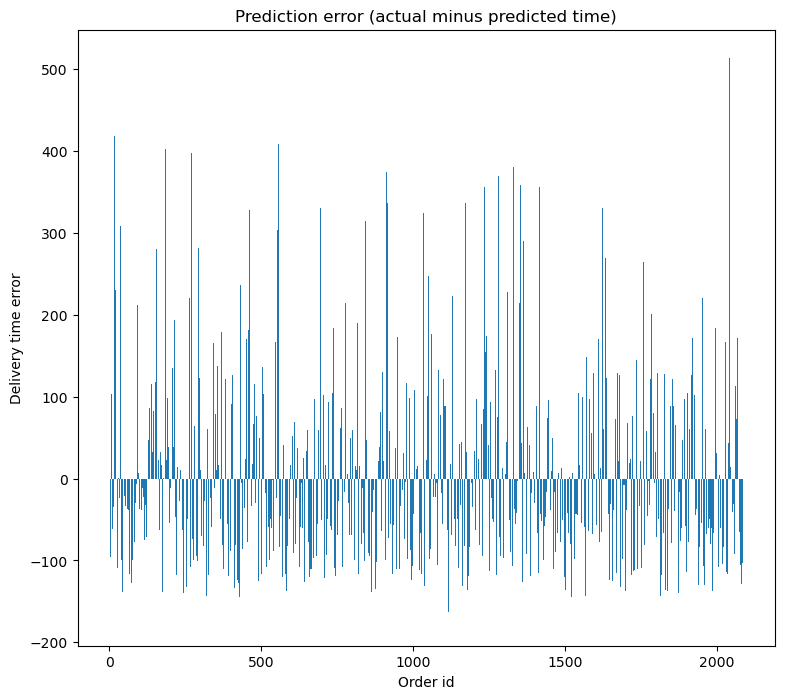

In [610]:
plt.figure(figsize=(9,8))
plt.bar(x,y1-y2)
plt.xlabel('Order id')
plt.ylabel('Delivery time error')
plt.title('Prediction error (actual minus predicted time)')